In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle

In [21]:
data = pd.read_csv('titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [22]:
col = ['Sex', 'Pclass', 'Fare', 'Age', 'Survived']
data = data[col]

sex_map = {'female': 0, 'male': 1}
data['Sex'] = data['Sex'].map(sex_map)

In [23]:
data.sample(3)

,Sex,Pclass,Fare,Age,Survived
20,1,2,26.000,35.0,0
722,0,2,21.000,30.0,1
400,0,3,9.825,21.0,0


In [ ]:
sns.countplot(data.Pclass)

count    887.000000
mean       2.305524
std        0.836662
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [25]:
train,test = train_test_split(data,test_size=0.2)

ACC: 0.7752808988764045
              precision    recall  f1-score   support

Not Survived       0.72      0.96      0.82        98
    Survived       0.92      0.55      0.69        80

    accuracy                           0.78       178
   macro avg       0.82      0.75      0.76       178
weighted avg       0.81      0.78      0.76       178



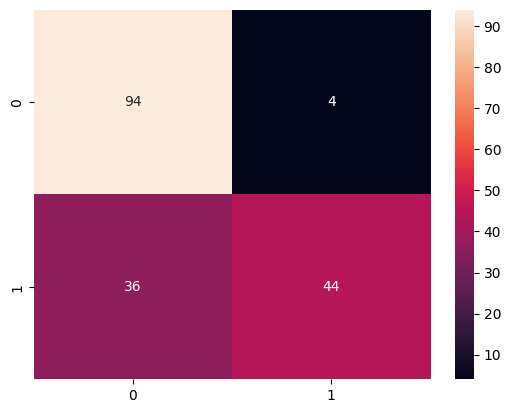

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def exp(max_depth, min_samples_split):
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(train.drop('Survived', axis=1), train['Survived'])

    preds = model.predict(test.drop('Survived', axis=1))
    acc = accuracy_score(test['Survived'], preds)
    cm = confusion_matrix(test['Survived'], preds)

    print("ACC:", acc)
    
    sns.heatmap(cm,annot=True)

    report = classification_report(test['Survived'], preds, target_names=['Not Survived', 'Survived'])
    print(report)

    with open('model.pkl', 'wb') as f:
        pickle.dump(model, f)


max_depth = 5
min_samples_split = 150

exp(max_depth, min_samples_split)

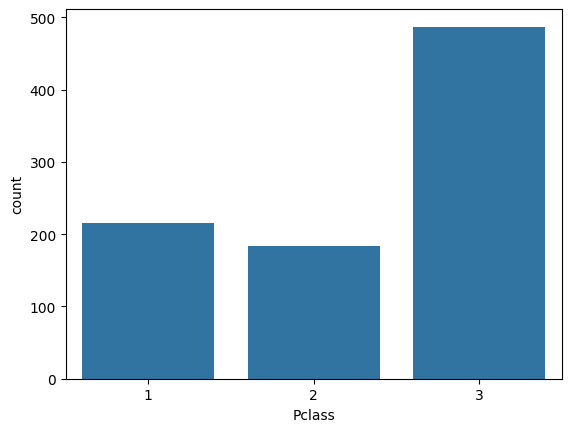

In [38]:
sns.countplot(x="Pclass", data=data)  
plt.show()

# Inference

In [ ]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f) 

In [45]:
new_data = pd.DataFrame([{
    'Sex': 1,        
    'Pclass': 1,     
    'Fare': 22.5,    
    'Age': 25.0      
}])

pred = model.predict(new_data)
print(pred)

[0]


In [46]:
new_data

,Sex,Pclass,Fare,Age
0,1,1,22.5,25.0


# Test API

In [47]:
import requests

def predict_model(data):
    url = 'http://127.0.0.1:4000/predict_model'
    response = requests.post(url, json=data)

    return response.json() if response.status_code == 200 else {'error': f'Reques failed with status code {response.status_code}'}

In [52]:
data = {
    'Sex': 0,        
    'Pclass': 1,     
    'Fare': 22.5,    
    'Age': 25.0      
}

pred = predict_model(data)
print(pred)

{'prediction': 'Survived'}
